# Applied Statistics - Tasks

**Author: Cecilia Pastore**

---

## **Table of content** <a class="anchor" id="Table_of_content"></a>


* [Introduction](#Introduction)
* [Task 1: Permutations and Combinations](#task1)
* [Task 2: numpy's Normal Distribution](#task2)
    * [2.1: Generate a Random distribution with mean ith mean 10.0 and standard deviation 3.0](#2.1)
    * [2.2: Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for normality](#2.2)
* [Conclusion On Part 2: Rainfall and temperature in Ireland](#Conclusion2)
* [References](#References)


#### **INTRODUCTION** <a class="anchor" id="Introduction"></a>

The following project has been formulated as Project Number Two for the subject 'Programming for Data Analysis' at Atlantic Technological University, Galway. The project assignment can be reviewed below before delving into the project itself.

### **Task 1: Permutations and Combinations** <a class="anchor" id="task1"></a>

---

**Task assignement**

>Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.
>
>Would you accept two errors? Explain.

First, we can import the necessary library.

In [21]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# print in tabulate format 
# https://pypi.org/project/tabulate/
from tabulate import tabulate

We define the variables needed to explore the problem: the total number of cups, the number of cups with milk added first, and the number of cups with tea added first.

In [22]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

We calculates the number of ways to select six cups (in this case cups with milk first) from a total of twelve using the math.comb formula (https://docs.python.org/3/library/math.html#math.comb).

In [23]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

The code creates a list of labels for cups based on the variable no_cups. The range(no_cups) [[]](https://www.w3schools.com/python/ref_func_range.asp) function generates a sequence of integers from 0 to no_cups - 1, which are then converted into a list. This results in a list of labels with values corresponding to the number of cups, providing a total of no_cups unique labels that can be used in probability calculations.

In [24]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

The code then does the following:
1. It selects six random labels from a list called labels using [random.sample() []](https://docs.python.org/3/library/random.html#random.sample).
2. It sorts the selected labels in place using the [sort() []](https://www.w3schools.com/python/ref_list_sort.asp) method.
3. Finally, it converts the sorted list of labels into a set [[]](https://docs.python.org/3/tutorial/datastructures.html#sets)

In [25]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

In [26]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 2, 4, 6, 8, 9}

Now that a label of 6 random cups from a group of 12 has been created, the code analyzes and counts the overlaps between combinations of cups and the selected milk labels.

Specifically, the code does the following:

1. **Generate Combinations**: It creates all possible combinations of no_cups_milk_first cups from no_cups using [itertools.combinations() []](https://docs.python.org/3/library/itertools.html).
2. **Calculate Overlaps**: For each combination, it converts both the combination and labels_milk into sets, finds their [intersection []](https://www.w3schools.com/python/ref_set_intersection.aspnp uni), and records the count of overlapping labels in the no_overlaps list.
3. **Count Unique Overlaps**: It uses np.unique()[[]](https://numpy.org/doc/2.0/reference/generated/numpy.unique.html) to count how many times each overlap occurs, providing a summary of the overlap frequencies.

The **output** will be a two-dimensional array, stored in counts, that contains:

1. The first array with the unique overlap counts.
2. The second array with the corresponding counts of how many combinations had each overlap. 

In general, the more often an overlap count appears, the higher the probability of finding that specific number of cups with milk first.

In [27]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
# https://docs.python.org/3/library/itertools.html
combs = list(itertools.combinations(labels, no_cups_milk_first))

In [28]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  # https://www.w3schools.com/python/ref_set_intersection.asp
  overlap = s1.intersection(s2)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))
  
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Print the results
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))


A bar chart [[]](https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html) is created to visualize the distribution of overlaps between combinations of cups and selected milk labels, illustrating how frequently different overlap counts occur in the data.

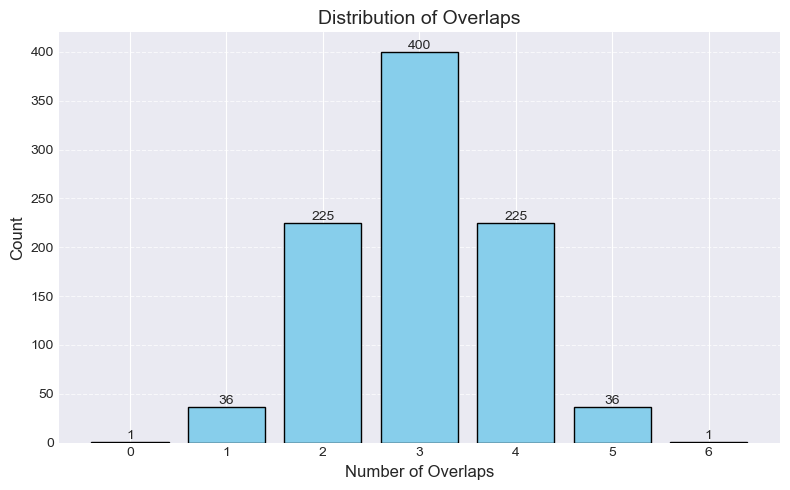

In [29]:
# Plotting the Numberso of possible overlapping
# source: https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html


# Create a figure.
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart with custom colors.
bars = ax.bar(counts[0], counts[1], color='skyblue', edgecolor='black')

# Add percentage labels above the bars.
# https://realpython.com/python-zip-function/
for bar, count in zip(bars, counts[1]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{count}', ha='center', va='bottom')  # Corrected this line

# Add labels and title.
ax.set_xlabel('Number of Overlaps', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Overlaps', fontsize=14)
ax.set_xticks(counts[0])  # Ensure all x-tick labels are displayed
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines

# Show the plot.
plt.tight_layout()  # Optimize layout
plt.show()

According to the bar chart, there is only one possibility out of 924 different combinations to select all 6 cups with milk first from a total of 12. To select at least 5 cups with milk first, there are 36 additional combinations, resulting in a total of 37 possibilities. This pattern continues for other overlap counts as well.

We can calculate the probability of selecting at least each number of milk-first cups from 0 to 6, where 0 means no milk-first cups are selected, and 6 means all 6 cups with milk are selected correctly from the group of 12. This probability is derived by dividing the number of successful combinations by the total combinations of 924.

The following code:

1. *Initializes an empty list*, selection_probability, to store the number of overlaps and their probabilities, along with a variable cumulative_overlapping set to 0.

2. *Loops through the counts* of overlaps in reverse [[]](https://www.w3schools.com/python/ref_func_reversed.asp) order:

    - For each overlap count, it updates the cumulative overlap.
    - It calculates the probability of selecting x cups with milk first by dividing the cumulative overlaps by the total number of combinations (ways).
    - It appends the result to the selection_probability list.

3. *Prepares the data* for tabulation [[]]( https://pypi.org/project/tabulate/) [[]](https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/) to display the cumulative probabilities more clearly using the tabulate function.

In [30]:
# Calculate cumulative probabilities for each number of cups with milk to be randomly selected 

# Initialize an array to store the number of overlaps and their probabilities
selection_probability = []
cumulative_overlapping = 0
number_of_cups = 6

# Calculate probabilities and store results in reverse order
# Source: https://www.w3schools.com/python/ref_func_reversed.asp
for i in reversed(counts[1]):  # Loop through the array in reverse
    cumulative_overlapping += i  # Update cumulative overlap count
    probability_cups_with_milk = cumulative_overlapping / ways  # Calculate probability
    selection_probability.append((number_of_cups, cumulative_overlapping, probability_cups_with_milk))  # Store as a tuple (count, probability)
    number_of_cups -= 1  # Decrease the cup count

# using tabulate to print the result in a readable format 
# https://pypi.org/project/tabulate/
# https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/

# Prepare data for tabulate
headers = ["Number of Cups", "Cumulative Overlaps", "Probability (%)"]
table = [(num_cups, cum_overlaps, f"{prob * 100:.2f}") for num_cups, cum_overlaps, prob in selection_probability]

# Print the results using tabulate
print(tabulate(table, headers=headers, tablefmt="rst"))


================  =====================  =================
  Number of Cups    Cumulative Overlaps    Probability (%)
================  =====================  =================
               6                      1               0.11
               5                     37               4
               4                    262              28.35
               3                    662              71.65
               2                    887              96
               1                    923              99.89
               0                    924             100
================  =====================  =================


As shown in the results, there is only a 0.11% chance of randomly selecting all 6 cups with milk first from a group of 12, without any specific capacity. However, if we allow for a possible error of 1, the probability of selecting at least 5 cups with milk first increases to around 4%. When considering the possibility of selecting at least 4 cups with milk first, the probability rises to 28.34%, providing a reasonable chance that a user, without any specific capacities, would mark this assumption as true.

We can visulalize the result for a better understanding. 

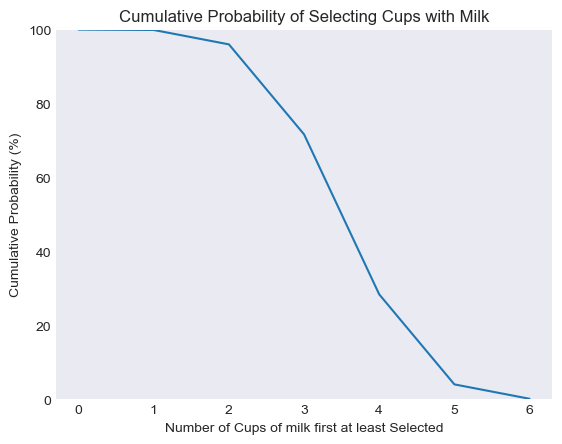

In [31]:
# Unpack the selection_probability list into separate lists
num_cups_list, cumulative_overlaps, probabilities = zip(*selection_probability)

# Convert probabilities to percentages for display purposes only (do not use for plotting)
probabilities_percentage = [prob * 100 for prob in probabilities]

# Plotting
plt.plot(num_cups_list, probabilities_percentage)
plt.title('Cumulative Probability of Selecting Cups with Milk')
plt.xlabel('Number of Cups of milk first at least Selected')
plt.ylabel('Cumulative Probability (%)')  # Update the ylabel to indicate percentage
plt.xticks(num_cups_list)  # Set x-ticks to the number of cups
plt.grid()
plt.ylim(0, 100)  # Set y-axis limits to show percentage range
plt.show()


##### **Conclusion**


**1. Hypothesis: We accept the claim of a special ability if the user can accurately identify which of cups in the experiment had milk added first**

Considering the scenario where a user guesses, there is only a 0.11% probability of correctly identifying all 6 cups with milk first in a group of 12 (6 with milk first and 6 with tea first). If the user successfully identifies all 6 cups, we can confidently reject the null hypothesis that the person has no special ability to discern whether milk or tea was added first.

**2. Hypothesis: We accept the claim of a special ability if the user can accurately identify at least 5 out of 6 cups with milk first in a group of 12 cups.**

If we allow for one error in our hypothesis testing, the probability of guessing 5 or more cups correctly increases to about 4%. In many scientific fields, a common significance threshold is set at [0.05 (or 5%)[]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/), indicating that a 5% chance of making a Type I error (rejecting a true null hypothesis) is generally considered acceptable.

*Therefore, I am inclined to reject the null hypothesis if the user correctly selects at least 5 cups with milk first out of the 6 in a total of 12 cups, as this would provide sufficient evidence to support the claim of a special ability*.

### **Task 2: numpy's Normal Distribution** <a class="anchor" id="task2"></a>

---

**Task assignement**

>In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.
>
>Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.
>
>Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

##### **2.1: Generate a Random distribution with mean ith mean 10.0 and standard deviation 3.0** <a class="anchor" id="2.1"></a>

------

First we can import the needed libraries. 

In [32]:
# Numerical structures and operations.
# Importing numpy for numerical operations and random data generation
import numpy as np

# Plotting.
# Importing matplotlib for plotting the data
import matplotlib.pyplot as plt

# Importing scipy.stats for statistical distributions and tests
import scipy.stats as stats

# Importing statsmodels for statistical models and tests
import statsmodels.api as sm

The following code generates a random sample of 5000 values from a normal distribution using the [[] numpy.random.normal function](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html) . It works through the following steps:

- Sets the random seed (np.random.seed(100)) [[]](https://www.geeksforgeeks.org/random-seed-in-python/)to ensure that the random numbers generated are reproducible.
- Defines the mean (mu = 10.0) and standard deviation (sigma = 0.3) of the normal distribution.
- The function np.random.normal(mu, sigma, 5000) is called to generate 5000 random values that follow the normal distribution with the defined mean and standard deviation.
- The generated values are stored in the array s, which can then be used for further analysis or visualization.

In [33]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the parameters of the normal distribution
mu, sigma = 10.0, 0.3  # Mean (mu) and standard deviation (sigma)

# Generate a random sample of size 5000 from the normal distribution
# Ref: https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html
s = np.random.normal(mu, sigma, 5000)

# Print first 10 values of s distribution with better formatting
print("First 10 values of the generated sample 's':")
print("--------------------------------------------")
print(s[:10])

First 10 values of the generated sample 's':
--------------------------------------------
[10.14901425  9.95852071 10.19430656 10.45690896  9.92975399  9.92975891
 10.47376384 10.23023042  9.85915768 10.16276801]


The mean, calculated using the function [[] numpy.mean()](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), and the standard deviation, calculated using the function [[] numpy.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html), are computed from the randomly generated sample s to verify that these values match the initial parameters of the normal distribution.

In [34]:
# Calculate the mean using numpy.mean() 
# Ref: https://numpy.org/doc/stable/reference/generated/numpy.mean.html
mu_s = np.mean(s)

# Calculate the standard deviation using numpy.std() 
# Ref: https://numpy.org/doc/stable/reference/generated/numpy.std.html
sigma_s = np.std(s)

# Print the calculated mean and standard deviation
print(f"Calculated Mean (mu_s): {mu_s:.2f}")
print(f"Calculated Standard Deviation (sigma_s): {sigma_s:.2f}")

Calculated Mean (mu_s): 10.00
Calculated Standard Deviation (sigma_s): 0.30


As seen from the printed results, the calculated mean and standard deviation closely match the initial parameters (mu = 10.0 and sigma = 0.3) used to generate the normal distribution.


The following code, inspired by the [[] Applied Statistics course by Ian McLoughlin](https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/03_normal.ipynb), calculates the Probability Density Function (PDF) of a normal distribution for a sample s.

- **Generating the Range of x Values**: The code first generates an array of x values that span from 5 standard deviations below the mean to 5 standard deviations above the mean using the [[] np.linspace() function](https://numpy.org/doc/stable/reference/generated/numpy.linspace.htm). This wide range ensures the plot covers almost all of the distribution, in line with the 68-95-99 rule (approximately  99.7% data lies within 3 standard deviations of the mean, with nearly all data lying within 5 standard deviations). [[]](https://www.tutorialspoint.com/show-the-68-95-99-7-rule-in-statistics-using-python).

- **Defining the PDF Function**:A function is defined that takes in the x values, along with the mean and standard deviation of the distribution. This function uses the formula for the normal distribution to calculate the probability density at each value of x, effectively plotting the bell curve of the distribution.

- **Calculating the PDF**:Finally, the function computes the corresponding PDF values for each x in the range, producing a distribution curve that represents the probability of different outcomes within the s sample.

In [35]:
# Create an array of x values for plotting the PDF, covering ±5 standard deviations
#This ensure close to 100% of the normal distribution value will be in the x range.
x = np.linspace(mu_s - 5*sigma_s, mu_s + 5*sigma_s, 5000)

# Define the probability density function (PDF) for the normal distribution
def f(x, mu_s, sigma_s):
    # Calculate the normalization constant for the normal distribution
    norm = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    # Calculate the PDF values at each x using the formula for the normal distribution
    return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

# Get the corresponding y values (PDF) for the x values using the normal distribution function
pdf = f(x, mu, sigma)

To visualize a distribution effectively, we define a reusable function, **plot_normal_distribution**, which creates a combined plot showing both the histogram of a sample (**s**) and the probability density function (**PDF**) of a normal distribution based on the sample's properties.
Key Features:

- **Input**: The function takes the sample data (s), an array of x values, the corresponding pdf values, and customizable colors for the histogram and PDF curve.
- **Plotting**: The function uses [[a] matplotlib](https://matplotlib.org/) to plot the histogram of the sample with some [[] transparency (using the alpha parameter)](https://www.learningaboutelectronics.com/Articles/How-to-change-the-transparency-of-a-graph-plot-in-matplotlib-with-Python.php#:~:text=Matplotlib%20allows%20you%20to%20adjust%20the%20transparency%20of,then%20you%20can%20make%20alpha%20greater%20than%201.), and overlays the normal distribution's PDF curve on top for comparison. 
- **Customization**: The plot includes a title, axis labels, gridlines, and a vertical line marking the mean (mu) of the distribution.

The code is ispired by [[] Fitting a Normal distribution to 1D data](https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data).

In [36]:
# Define a function to plot the histogram of the sample and the PDF of the normal distribution
# The function takes in the sample data 's', the array of x values, the PDF values, and other customization parameters for the plot.
def plot_normal_distribution(s, x, pdf, col_hist, col_pdf, title):
    
    # Set up the style for the plot
    plt.style.use('seaborn-v0_8-darkgrid')

    # Create a new figure with specified size
    plt.figure(figsize=(10, 5))

    # Plot the histogram of the sample with some transparency
    plt.hist(s, bins=50, density=True, alpha=0.3, color=col_hist, edgecolor='black', label='Sample Histogram')

    # Plot the normal distribution PDF on top of the histogram
    plt.plot(x, pdf, color=col_pdf, linewidth=3, label='Normal Distribution PDF')

    # Set the title and axis labels
    plt.title(f'Histogram with PDF: {title}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend to the plot
    plt.legend(fontsize=12)

    # Enable gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Draw a vertical line at the mean (mu)
    plt.axvline(mu, color='green', linestyle='--', label='Mean', linewidth=2)

    # Display the plot
    plt.show()

Now, we can use the previously defined function **plot_normal_distribution** to visualize the distribution. The function takes the following arguments:

- **s**: The sample data, generated using np.random.normal.
- **x**: The range of x values over which the PDF is calculated.
- **"blue**": The color used for the histogram.
- **"red"**: The color used for the PDF curve.
- **title**="manually calculated": The title of the plot, indicating that the PDF was calculated by directly applying the mathematical formula.

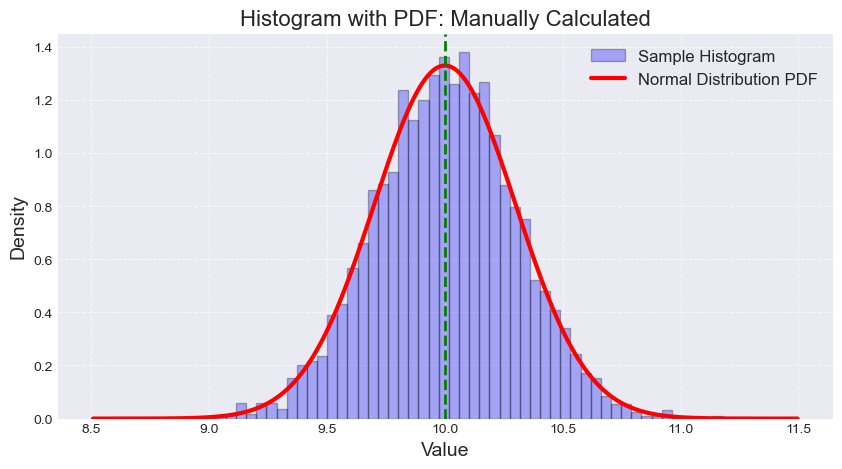

In [37]:
# Call the function to plot
plot_normal_distribution(s, x, pdf, "blue", "red", title="Manually Calculated")

Now, instead of manually calculating the PDF using the mathematical formula, we can do the same using the scipy.stats.norm.pdf function to compute the probability density function (PDF) of the normal distribution [](https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/). This function is part of the [[] SciPy library](https://scipy.org/), which offers efficient and reliable statistical functions for working with distributions.

[[] stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) is used to calculate the PDF of a normal distribution for a given range of x values. It takes the following arguments:

- x: The points at which the PDF is evaluated.
- mu_s: The mean of the distribution.
- sigma_s: The standard deviation of the distribution.

We can then plot the result using the previously defined **plot_normal_distribution**.

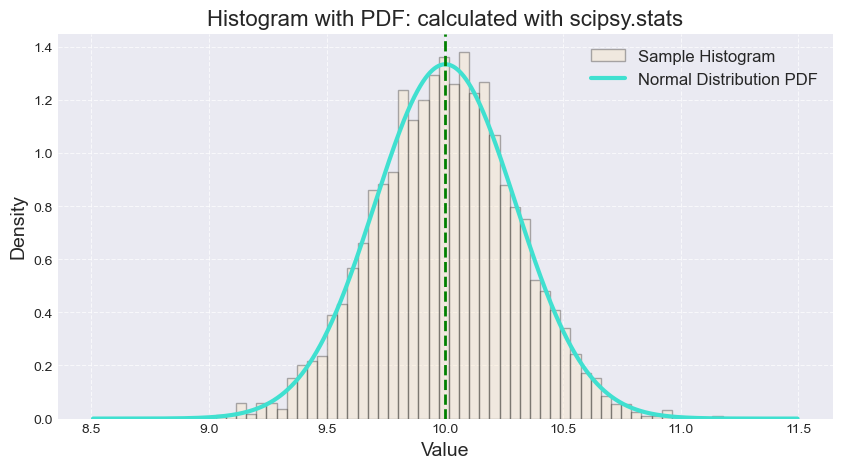

In [38]:
# same with scipsy stat norm pdf function 
# https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Calculate the PDF using scipy's norm function
pdf = stats.norm.pdf(x, mu_s, sigma_s)

# Call the function to plot
plot_normal_distribution(s, x, pdf, "moccasin", "turquoise", title="calculated with scipsy.stats")


##### **2.2: Perform the Shapiro-Wilk and Kolmogorov-Smirnov tests for normality** <a class="anchor" id="2.2"></a>

------

The **Shapiro-Wilk test** [[]](https://builtin.com/data-science/shapiro-wilk-test) is a statistical test used to assess whether a given dataset follows a normal distribution. It is commonly used for small sample sizes.

- **Null Hypothesis**: There is no evidence to reject the null hypothesis that the data is normally distributed.
- **Alternative Hypothesis**: The data does not follow a normal distribution.

The test produces a test statistic and a p-value. If the p-value is below a predefined significance level (often 0.05 [[]](https://community.jmp.com/t5/JMP-Knowledge-Base/How-do-I-interpret-the-Shapiro-Wilk-test-for-normality-in-JMP/ta-p/575365)), we reject the null hypothesis and conclude that the data is not normally distributed.

It is important to know that the Shapiro-Wilk test can produce false negatives (i.e., rejecting the null hypothesis when the data is actually normal) or false positives (i.e., failing to reject the null hypothesis when the data is not normal). For this reason, the use of other methods for checking normality, such as visualization techniques (e.g., histograms, Q-Q plots), is always advised.

The following code performs the Shapiro-Wilk test on the sample distribution s using the [[] stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function to test for normality. The significance level is set at 0.05, and based on the p-value, the code prints the Shapiro-Wilk test statistic and p-value, followed by a decision on whether to reject or fail to reject the null hypothesis. 

If the p-value is less than 0.05, the null hypothesis (that the data follows a normal distribution) is rejected; otherwise, the null hypothesis is not rejected, suggesting the data may follow a normal distribution.

In [39]:
# perfom the shapiro test 
# https://www.statology.org/shapiro-wilk-test-python/

# Perform the Shapiro-Wilk test
shapiro_stat, p_value = stats.shapiro(s)

print(f'Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9997
P-value: 0.5836
Fail to reject the null hypothesis: the data may be normally distributed.


As expected, the shapiro test result a p-value of 0.58 failing to reject the null hypotesis.

Another test that we can use to asses normality is the **Kolmogorov-Smirnov (K-S)test** [[]](https://www.statology.org/kolmogorov-smirnov-test-python/) [[]](https://pyshark.com/test-for-normality-using-python/#kolmogorov-smirnov-test-in-python). It tests whether the sample comes from a normal distribution by comparing the empirical cumulative distribution function (ECDF) of the sample with the cumulative distribution function (CDF) of a normal distribution. 

A significant p-value (below a threshold like 0.05) indicates that the sample likely does not follow a normal distribution.

The following code performs the Kolmogorov-Smirnov (K-S) test for normality using [[] stats.kstest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) from the SciPy library. The test compares the sample data (s) to a normal distribution ('norm'), with the mean (mu_s) and standard deviation (sigma_s) as parameters.

The significance level is set at 0.05. Based on the p-value, the code prints the test statistic and p-value, and then makes a decision on whether to reject or fail to reject the null hypothesis.

In [40]:
# Perform the Kolmogorov-Smirnov test for normality
ks_statistic, p_value = stats.kstest(s, 'norm', args=(mu_s, sigma_s))

# Output the results
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")


KS Statistic: 0.0110
P-value: 0.5786
Fail to reject the null hypothesis: the data may be normally distributed.
